# Import Libraries

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load dataset

In [146]:
df_fu = pd.read_csv('furtilizer_used.csv')
df_fu.head(5)

,DomainCode,Domain,AreaCode,Area,ElementCode,Element,ItemCode,Item,YearCode,Year,Unit,Value,Flag,FlagDescription
0,RFN,Fertilizers by Nutrient,165,Pakistan,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1961,1961,tonnes,41659,Qm,Official data from questionnaires and/or natio...
1,RFN,Fertilizers by Nutrient,165,Pakistan,5157,Agricultural Use,3103,Nutrient phosphate P2O5 (total),1961,1961,tonnes,500,Qm,Official data from questionnaires and/or natio...
2,RFN,Fertilizers by Nutrient,165,Pakistan,5157,Agricultural Use,3103,Nutrient phosphate P2O5 (total),1962,1962,tonnes,210,Qm,Official data from questionnaires and/or natio...
3,RFN,Fertilizers by Nutrient,165,Pakistan,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1962,1962,tonnes,41160,Qm,Official data from questionnaires and/or natio...
4,RFN,Fertilizers by Nutrient,165,Pakistan,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1963,1963,tonnes,67620,Qm,Official data from questionnaires and/or natio...


## Dealing with missing values.

In [147]:
df_fu.isnull().sum()

DomainCode         0
Domain             0
AreaCode           0
Area               0
ElementCode        0
Element            0
ItemCode           0
Item               0
YearCode           0
Year               0
Unit               0
Value              0
Flag               0
FlagDescription    0
dtype: int64

In [148]:
df_fu.dtypes

DomainCode         object
Domain             object
AreaCode            int64
Area               object
ElementCode         int64
Element            object
ItemCode            int64
Item               object
YearCode            int64
Year                int64
Unit               object
Value               int64
Flag               object
FlagDescription    object
dtype: object

As we don't have any null/NaN/0 value so we'll move towards Normalization..

In [149]:
df_fu1 = df_fu[['Item', 'Year','Value']]

In [150]:
df_fu1

,Item,Year,Value
0,Nutrient nitrogen N (total),1961,41659
1,Nutrient phosphate P2O5 (total),1961,500
2,Nutrient phosphate P2O5 (total),1962,210
3,Nutrient nitrogen N (total),1962,41160
4,Nutrient nitrogen N (total),1963,67620
...,...,...,...
170,Nutrient nitrogen N (total),2019,3505356
171,Nutrient phosphate P2O5 (total),2019,1099707
172,Nutrient phosphate P2O5 (total),2020,1204060
173,Nutrient nitrogen N (total),2020,3533784


### Simple Feature Scaling

In [151]:
df_fu1['Value']=df_fu1['Value']/df_fu1['Value'].max()
df_fu1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17896\2735968265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Item,Year,Value
0,Nutrient nitrogen N (total),1961,0.011789
1,Nutrient phosphate P2O5 (total),1961,0.000141
2,Nutrient phosphate P2O5 (total),1962,0.000059
3,Nutrient nitrogen N (total),1962,0.011648
4,Nutrient nitrogen N (total),1963,0.019135
...,...,...,...
170,Nutrient nitrogen N (total),2019,0.991955
171,Nutrient phosphate P2O5 (total),2019,0.311198
172,Nutrient phosphate P2O5 (total),2020,0.340728
173,Nutrient nitrogen N (total),2020,1.000000


In [152]:
df_fu1['Year']=df_fu1['Year']/df_fu1['Year'].max()
df_fu1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17896\1033678409.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Item,Year,Value
0,Nutrient nitrogen N (total),0.970792,0.011789
1,Nutrient phosphate P2O5 (total),0.970792,0.000141
2,Nutrient phosphate P2O5 (total),0.971287,0.000059
3,Nutrient nitrogen N (total),0.971287,0.011648
4,Nutrient nitrogen N (total),0.971782,0.019135
...,...,...,...
170,Nutrient nitrogen N (total),0.999505,0.991955
171,Nutrient phosphate P2O5 (total),0.999505,0.311198
172,Nutrient phosphate P2O5 (total),1.000000,0.340728
173,Nutrient nitrogen N (total),1.000000,1.000000


Analysis

[Text(0.5, 1.0, 'Comparison of Item and Value, with respect to year')]

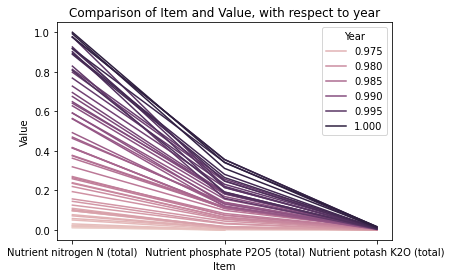

In [153]:
sns.lineplot(data=df_fu1,x='Item',y='Value',hue='Year').set(title='Comparison of Item and Value, with respect to year')

[Text(0.5, 1.0, 'Comparison of Item and Quantity with respect to year')]

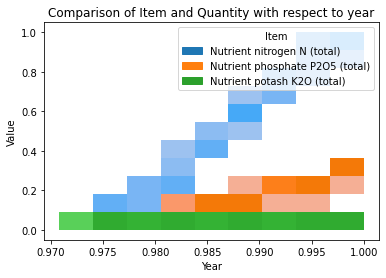

In [154]:
sns.histplot(data=df_fu1,x='Year',y='Value',hue='Item').set(title='Comparison of Item and Quantity with respect to year')

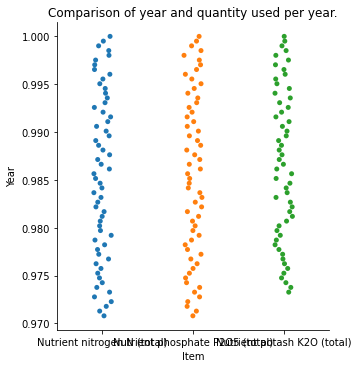

In [155]:
sns.catplot(x='Item',y='Year',data=df_fu1).set(title='Comparison of year and quantity used per year.')

<AxesSubplot:xlabel='Year', ylabel='Value'>

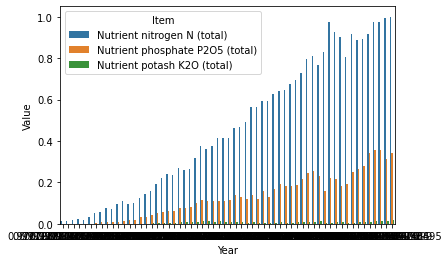

In [156]:
sns.barplot(x='Year',y='Value',hue='Item',data=df_fu1)

In [157]:

bins = np.linspace(min(df_fu1['Year']),max(df_fu1['Year']),6)
age_groups= ['x','y','z']
df_fu1['Year']=pd.cut(df_fu1['Year'],bins,include_lowest=True)
# df_fu['Year']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17896\3583446780.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
df_fu1


,Item,Year,Value
0,Nutrient nitrogen N (total),"(0.97, 0.977]",0.011789
1,Nutrient phosphate P2O5 (total),"(0.97, 0.977]",0.000141
2,Nutrient phosphate P2O5 (total),"(0.97, 0.977]",0.000059
3,Nutrient nitrogen N (total),"(0.97, 0.977]",0.011648
4,Nutrient nitrogen N (total),"(0.97, 0.977]",0.019135
...,...,...,...
170,Nutrient nitrogen N (total),"(0.994, 1.0]",0.991955
171,Nutrient phosphate P2O5 (total),"(0.994, 1.0]",0.311198
172,Nutrient phosphate P2O5 (total),"(0.994, 1.0]",0.340728
173,Nutrient nitrogen N (total),"(0.994, 1.0]",1.000000


<AxesSubplot:xlabel='Year', ylabel='Value'>

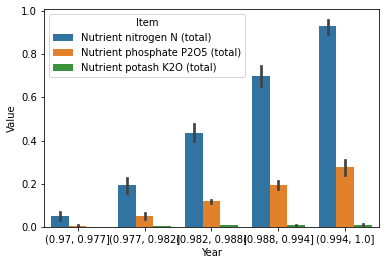

In [159]:
sns.barplot(x='Year',y='Value',hue='Item',data=df_fu1)

In [160]:
px.histogram(df_fu1, x="Item", y="Value",color='Year',title='Comparison of Furtilizer Quantity used with respect to year')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'Year=(0.97, 0.977]<br>Item=%{x}<br>sum of Value=%{y}<extra></extra>',
              'legendgroup': '(0.97, 0.977]',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '(0.97, 0.977]',
              'offsetgroup': '(0.97, 0.977]',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient potash K2O (total)', 'Nutrient potash K2O (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient potash K2O (total)', 'Nutrient potash K2O (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient potash K2O (total)', 'Nutrient potash K2O (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient potash K2O (total)'], dtype=object),
              'xaxis': 'x',
              'y': array([1.17887794e-02, 1.41491387e-04, 5.94263826e-05, 1.16475710e-02,
                          1.91352952e-02, 1.78279148e-04, 2.91189275e-04, 2.38121515e-02,
                          1.95942933e-02, 3.52313554e-04, 1.10674563e-03, 3.04996004e-02,
                          4.07495195e-05, 5.99923481e-05, 5.02127464e-02, 3.61567091e-03,
                          1.09350204e-02, 5.75929372e-02, 7.03495177e-04, 3.80328849e-04,
                          7.71314829e-02, 9.56510075e-03, 8.62022127e-03, 7.11755444e-02,
                          3.46653898e-04, 2.10539184e-04, 9.73384338e-02, 1.05357317e-02,
                          1.37897506e-02, 1.09296437e-01, 3.96175884e-04]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'Year=(0.977, 0.982]<br>Item=%{x}<br>sum of Value=%{y}<extra></extra>',
              'legendgroup': '(0.977, 0.982]',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '(0.977, 0.982]',
              'offsetgroup': '(0.977, 0.982]',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['Nutrient potash K2O (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient potash K2O (total)',
                          'Nutrient potash K2O (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutrient nitrogen N (total)', 'Nutrient potash K2O (total)',
                          'Nutrient potash K2O (total)', 'Nutrient nitrogen N (total)',
                          'Nutrient phosphate P2O5 (total)', 'Nutrient phosphate P2O5 (total)',
                          'Nutr